In [1]:
from google.cloud import aiplatform

aiplatform.init(project='dental-treatment-detection', location='us-central1')

In [6]:
# Get the model
model = aiplatform.Model('projects/533112800844/locations/us-central1/models/6924749520500686848')

# Get evaluations
evaluations = model.list_model_evaluations()
evaluation = evaluations[0]

print(f"Evaluation metrics:")
print(evaluation.metrics)

Evaluation metrics:


In [7]:
# Convert proto to dict
metrics = dict(evaluation.metrics)

# Print all available metrics
for key, value in metrics.items():
    print(f"{key}: {value}")

evaluatedBoundingBoxCount: 1344.0
boundingBoxMeanAveragePrecision: 0.70889723
boundingBoxMetrics: [<proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcfc5e0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcff1f0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcfcdc0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcffca0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcff5e0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcff4c0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcff550>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcff6a0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcfd510>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcfd960>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcfd8a0>, <proto.marshal.collections.maps.MapComposite object at 0x7fb8ebcff070>, <proto.marshal.collections.maps.MapCo

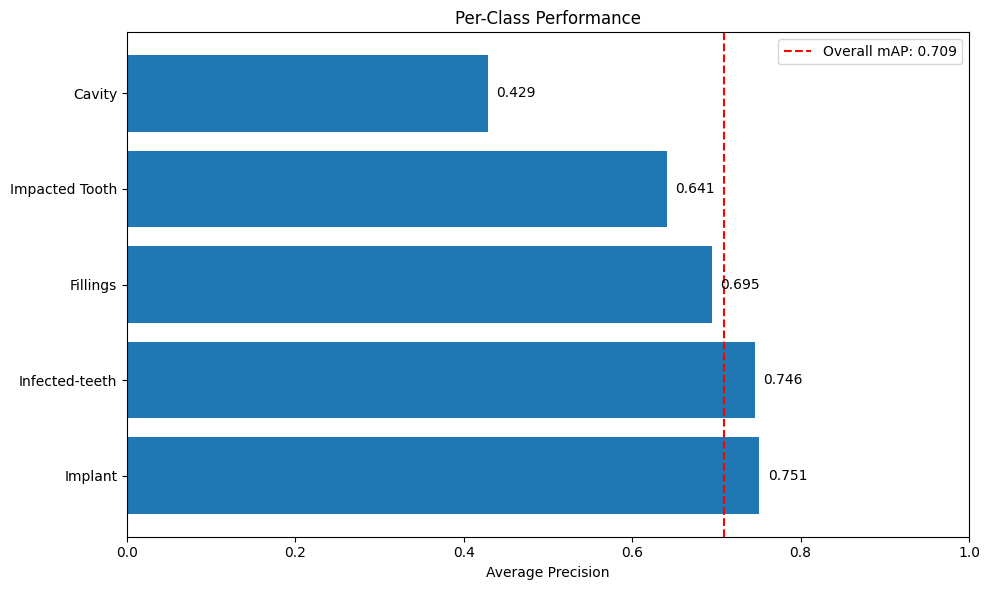

In [10]:
import matplotlib.pyplot as plt

# Per-class metrics from console
per_class_data = {
    'Implant': 0.751,
    'Infected-teeth': 0.746,
    'Fillings': 0.695,
    'Impacted Tooth': 0.641,
    'Cavity': 0.429
}

overall_map = 0.709

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
classes = list(per_class_data.keys())
aps = list(per_class_data.values())

bars = ax.barh(classes, aps)
for i, (bar, val) in enumerate(zip(bars, aps)):
    ax.text(val + 0.01, i, f'{val:.3f}', va='center')

ax.axvline(x=overall_map, color='red', linestyle='--', label=f'Overall mAP: {overall_map:.3f}')
ax.set_xlabel('Average Precision')
ax.set_title('Per-Class Performance')
ax.set_xlim([0, 1])
ax.legend()
plt.tight_layout()
plt.savefig('per_class_performance.png', dpi=300, bbox_inches='tight')
plt.show()

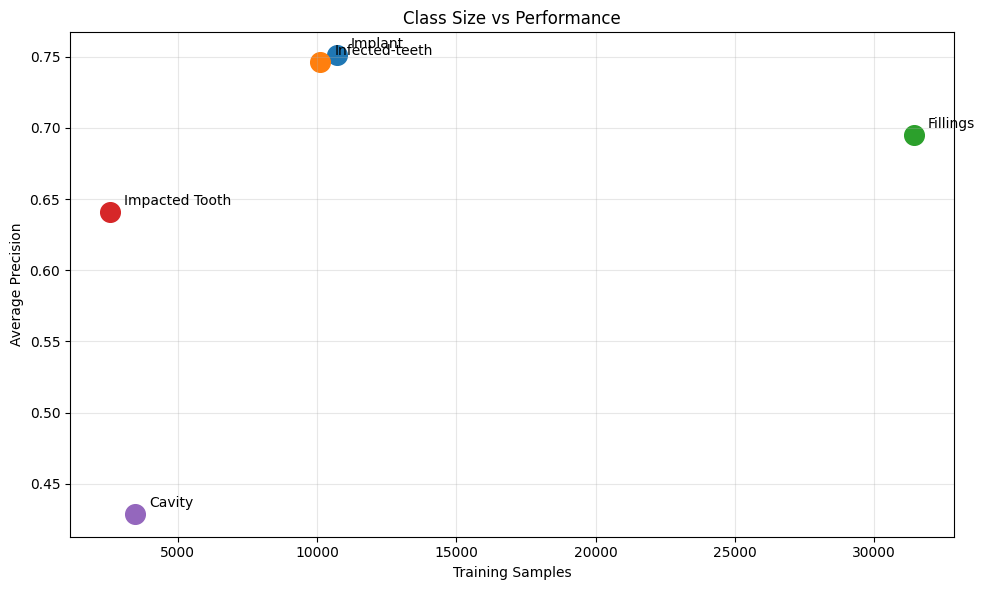

In [11]:
# Training data distribution
class_counts = {
    'Fillings': 31434,
    'Implant': 10704,
    'Infected-teeth': 10116,
    'Cavity': 3456,
    'Impacted Tooth': 2568
}

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for cls in per_class_data.keys():
    ax.scatter(class_counts[cls], per_class_data[cls], s=200)
    ax.annotate(cls, (class_counts[cls], per_class_data[cls]), 
                xytext=(10, 5), textcoords='offset points')

ax.set_xlabel('Training Samples')
ax.set_ylabel('Average Precision')
ax.set_title('Class Size vs Performance')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('class_size_vs_performance.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Save metrics to JSON
metrics_export = {
    'overall': {
        'mAP': overall_map,
        'precision': 0.92,
        'recall': 0.842,
        'total_images': 9452,
        'training_images': 8839,
        'validation_images': 370,
        'test_images': 243
    },
    'per_class': [
        {'class': k, 'ap': v, 'sample_count': class_counts[k]} 
        for k, v in per_class_data.items()
    ],
    'model_id': '6924749520500686848'
}

import json
with open('model_metrics.json', 'w') as f:
    json.dump(metrics_export, f, indent=2)

print("Saved model_metrics.json")

Saved model_metrics.json
